# 03 – Exploratory Data Analysis  
**CRISP-DM Phase 2: Data Understanding**  
Here we profile the cleaned dataset, generate summary statistics and visualise key distributions to assess data quality and patterns.

### Objectives
* Compute summary statistics (`.describe()`, skewness) for numeric fields.  
* Visualise the distribution of `Price` (histogram + KDE, log-scale).  
* Plot time trends (`Year` and `Year–Month`) to reveal seasonality.  
* Compare average prices by `County`.  
* Generate a correlation heat-map (Pearson & Spearman).  

### Inputs
* `outputs/datasets/collection/HousePricesRecords_clean.csv`  

### Outputs
* Inline plots: histograms, line charts, bar charts, heat-maps  
* “Key Insights” bullet list summarising major patterns  

### Additional Comments  
#### Business Requirements Addressed  
* **BR1**: Delivers visualisations for users to explore historic prices (Correlation tab).  
* **BR2**: Highlights strong predictors to inform hypothesis selection.  

#### Additional Notes  
* Uses a 1 000-row sample for speed; full data integration planned for v2.  



---


#### Import Libraries & Load Cleaned Data  
This cell brings in the Python libraries for tabular data handling (`pandas`) and visualisation (`matplotlib` & `seaborn`), then reads in the cleaned dataset produced in Notebook 02 so we can begin our exploratory analysis.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df_chunk = pd.read_csv("outputs/datasets/collection/HousePricesRecords_clean.csv")

#### Generate Descriptive Statistics  
This cell calls `df_chunk.describe()` to produce summary statistics (count, mean, standard deviation, min, quartiles, and max) for all numeric columns. These metrics give a quick overview of central tendency, variability, and potential outliers before diving deeper into visual analysis.


In [2]:
df_chunk.describe()

,Price,Old/New,Duration,Year,Month,RegionMedianPrice,RegionSaleCount,CountyMedianPrice,CountySaleCount,LogPrice
count,9.890000e+02,989.000000,989.000000,989.0,989.0,9.890000e+02,989.000000,989.000000,989.000000,989.000000
mean,2.771186e+05,0.008089,0.828109,2017.0,6.0,2.580313e+05,6.397371,243186.240142,21.919110,12.291166
std,2.047842e+05,0.089620,0.377476,0.0,0.0,1.520746e+05,10.408500,108427.704134,19.316969,0.741775
min,1.250000e+03,0.000000,0.000000,2017.0,6.0,1.500000e+04,1.000000,47500.000000,1.000000,7.131699
25%,1.440000e+05,0.000000,1.000000,2017.0,6.0,1.550000e+05,2.000000,160250.000000,10.000000,11.877576
50%,2.300000e+05,0.000000,1.000000,2017.0,6.0,2.295000e+05,3.000000,228475.000000,17.000000,12.345839
75%,3.430000e+05,0.000000,1.000000,2017.0,6.0,3.215000e+05,6.000000,300000.000000,25.000000,12.745489
max,1.560000e+06,1.000000,1.000000,2017.0,6.0,1.195000e+06,49.000000,598750.000000,77.000000,14.260197


#### Inspect Categorical Variable Distributions  
This cell iterates over important categorical columns and prints the frequency of each category. By examining `value_counts()`, you can spot imbalances, rare categories, or unexpected labels (typos), which informs any further grouping or cleaning before analysis.


In [3]:
categorical_cols = ["Old/New", "Duration", "County", "Town/City"]
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df_chunk[col].value_counts())


Value counts for Old/New:
Old/New
0    981
1      8
Name: count, dtype: int64

Value counts for Duration:
Duration
1    819
0    170
Name: count, dtype: int64

Value counts for County:
County
GREATER LONDON                  75
KENT                            43
HAMPSHIRE                       39
DEVON                           39
ESSEX                           29
                                ..
MIDDLESBROUGH                    1
BATH AND NORTH EAST SOMERSET     1
BRACKNELL FOREST                 1
BLACKPOOL                        1
ISLE OF ANGLESEY                 1
Name: count, Length: 103, dtype: int64

Value counts for Town/City:
Town/City
LONDON             47
BRISTOL            23
NOTTINGHAM         15
POOLE              12
PLYMOUTH           11
                   ..
FALMOUTH            1
SPALDING            1
BAGSHOT             1
KNEBWORTH           1
BISHOP AUCKLAND     1
Name: count, Length: 435, dtype: int64


#### Visualise House Price Distribution  
This cell plots the distribution of the `Price` column using a histogram with an overlaid kernel density estimate (KDE). This helps you understand the overall shape of the data—whether it’s skewed, has multiple modes, or contains outliers—before deciding on any transformations or modeling approaches.


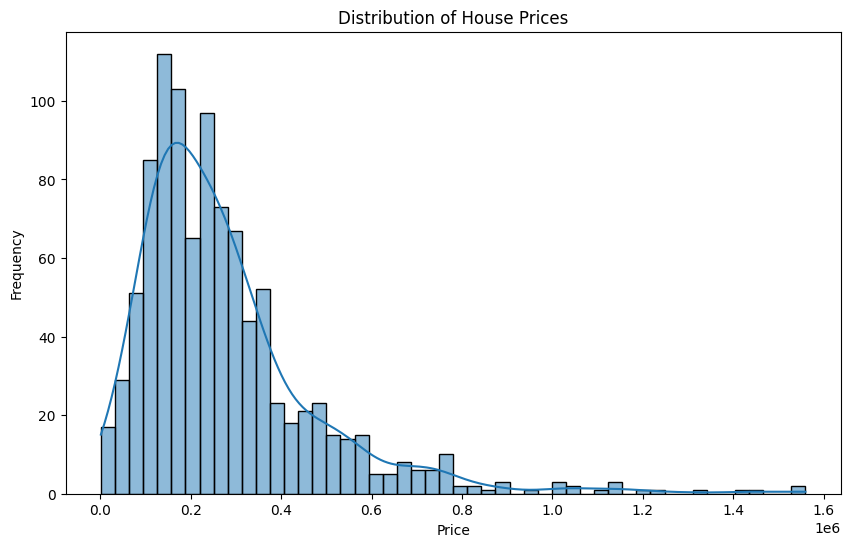

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df_chunk['Price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#### Plot Trend of Average House Price Over Time  
This cell calculates the mean sale price for each year and presents it as a line chart. By grouping `df_chunk` by the `Year` column and computing `mean()`, we capture the annual price trend. The line plot—with markers at each year—visually highlights upward or downward shifts in average housing costs over time.


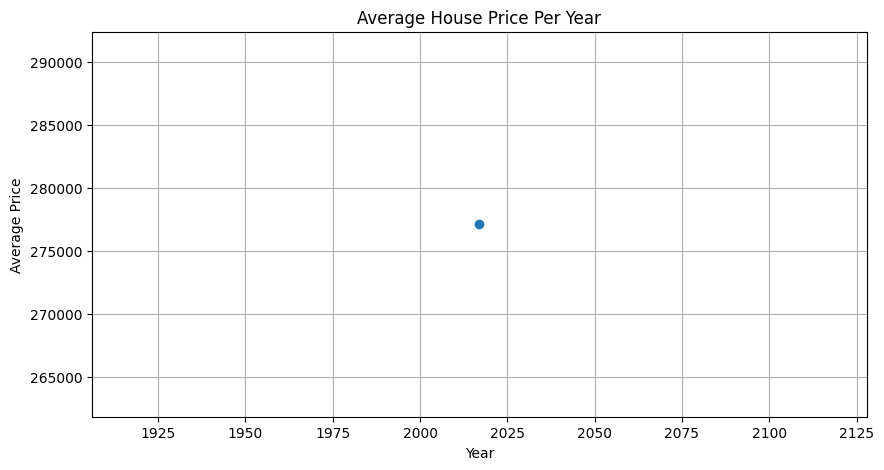

In [5]:
avg_price_year = df_chunk.groupby("Year")['Price'].mean()
avg_price_year.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Average House Price Per Year')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.grid(True)
plt.show()

#### Compare Average House Price by County  
This cell computes the mean sale price for each county, sorts the counties in descending order of average price, and renders a bar chart to highlight regional price differences. Rotating the x-axis labels ensures readability given the number of counties.


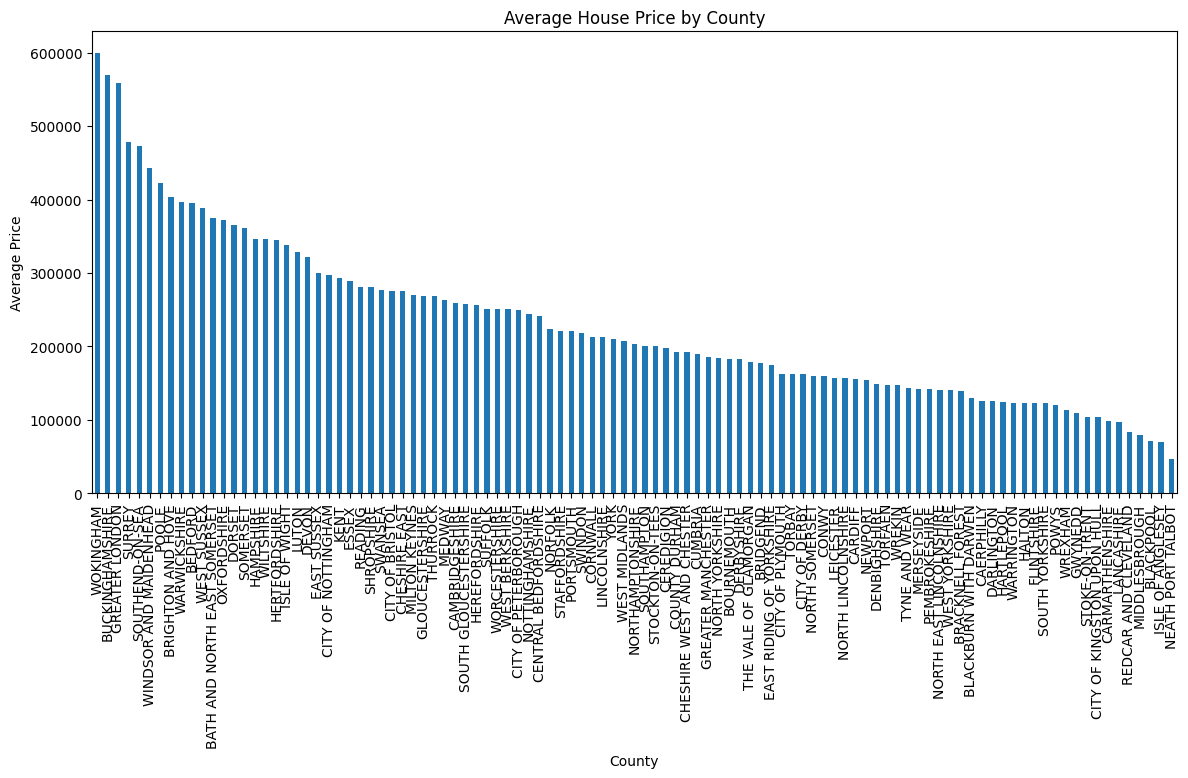

In [6]:
plt.figure(figsize=(14, 6))
df_chunk.groupby("County")["Price"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Average House Price by County")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.show()

#### Plot Correlation Heatmap  
This cell computes the pairwise Pearson correlation coefficients for all numeric columns in `df_chunk` and displays them in a color-coded heatmap:

- `df_chunk.corr(numeric_only=True)` builds the correlation matrix.  
- `sns.heatmap(..., annot=True, cmap="coolwarm", fmt=".2f")` renders the matrix with annotations (two-decimal coefficients) and a diverging blue-red palette to highlight strong positive or negative relationships.  
- The figure size and title make the plot easy to read and interpret.


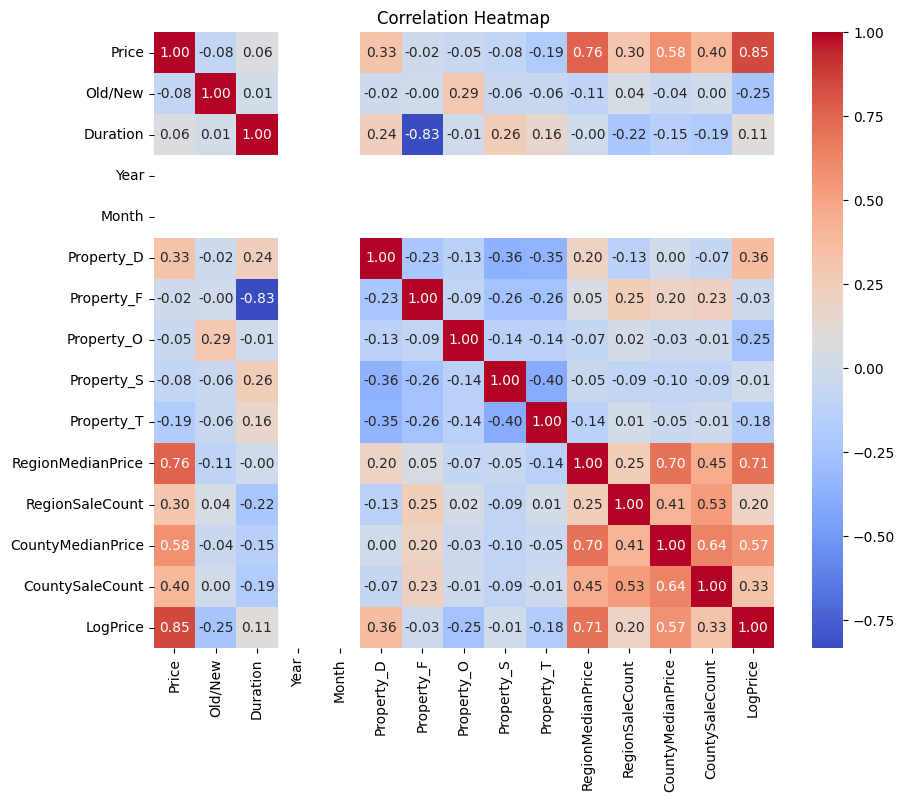

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_chunk.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()